In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import optimize
import pandas as pd
import os
from math import *

In [80]:
def assigned_fun(x):
    return sin(2*pi*x)+tanh(2*pi*x)

In [81]:
df=pd.DataFrame([])
X=np.random.random(100)
assigned_fun_v=np.vectorize(assigned_fun)
T=assigned_fun_v(X)
y=T+np.random.randn(T.size)*np.sqrt(0.2)

In [82]:
#Dividing the data set as 80:20 (train:test).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

Text(0.5, 1.0, 'Scatter plot of the generated data')

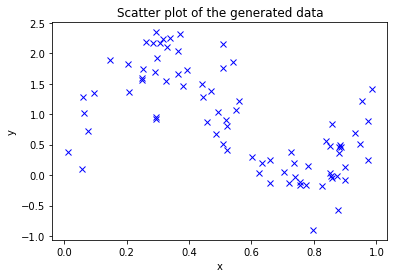

In [83]:
plt.plot(X_train,y_train,'bx')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of the generated data')

In [84]:
def X_attributes_fun(x,m):
    X_attributes=np.zeros((x.size,m+1))
    for i in range(m+1):
        X_attributes[:,i]=x**i
    return X_attributes
def J_fun(X_attributes,y,w,lam):
    err=y-(X_attributes @ w)
    J = 0.5*(err @ err + lam*((w[1:] @ w[1:])))
    J_der=np.zeros((w.size))
    J_der=(X_attributes.transpose() @ err) + lam*w
    J_der[0]-=lam*w[0]
    return J,J_der
def y_estimate_fun(x,w,m):
    X_attributes=X_attributes_fun(x,m)
    return X_attributes @ w

#Polynomial Regression
def poly_reg(x,y,m,lam):
    X_attributes=X_attributes_fun(x,m)
    w_o=np.ones(m+1)
    def cost(w):return J_fun(X_attributes,y,w,lam)[0]
    def cost_der(w): return J_fun(X_attributes,y,w,lam)[1]
    wopt = optimize.minimize(cost,w_o,method='BFGS',options={'disp': False})
#     def func2d(w):
#         return cost(w),cost_der(w)
#     minimizer_kwargs = {"method":"L-BFGS-B", "jac":True}
#     wopt = optimize.basinhopping(func2d, w_o, minimizer_kwargs=minimizer_kwargs,niter=200)
    return wopt.fun,wopt.x
def E_rms(x,w,lam):
    err=assigned_fun_v(x)-y_estimate_fun(x,w,w.size-1)
    ans=0.5*((err @ err) + lam*(w @ w))
    return sqrt(2*ans/x.size)

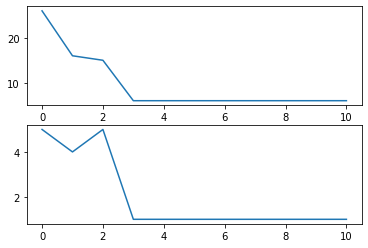

In [85]:
#Ignore it this is not in the assignment question just for analysis
m=np.arange(11)
lam=0
#J_train_m=np.array([poly_reg(X_train,y_train,i,0)[1] for i in m])
J_train_m=np.zeros_like(m)
J_test_m=np.zeros_like(m)
for i in m:
    J_train_m[i],w_m=poly_reg(X_train,y_train,i,lam)
    X_attributes_m=X_attributes_fun(X_test,i)
    J_test_m[i]=J_fun(X_attributes_m,y_test,w_m,lam)[0]
fig, axes = plt.subplots(2,1)
axes[0].plot(m,J_train_m)
axes[1].plot(m,J_test_m)

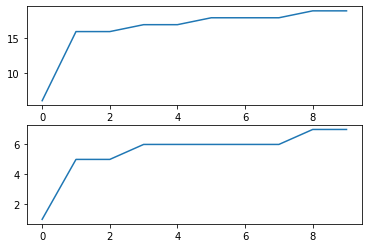

In [86]:
#Ignore it this is not in the assignment question just for analysis
m=3
lam=np.arange(10)
#J_train_m=np.array([poly_reg(X_train,y_train,i,0)[1] for i in m])
J_train_lam=np.zeros_like(lam)
J_test_lam=np.zeros_like(lam)
for i in lam:
    J_train_lam[i],w_lam=poly_reg(X_train,y_train,m,i)
    X_attributes_lam=X_attributes_fun(X_test,m)
    J_test_lam[i]=J_fun(X_attributes_lam,y_test,w_lam,i)[0]
fig, axes = plt.subplots(2,1)
axes[0].plot(lam,J_train_lam)
axes[1].plot(lam,J_test_lam)

Text(0.5, 1.0, 'Estimated curve for degree 3 and lambda 0')

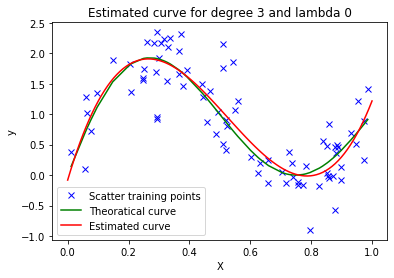

In [87]:
#Ignore it this is not in the assignment question just for analysis
m=3;
lam=0;
j_t,w_t=poly_reg(X_train,y_train,m,lam)
plt.plot(X_train,y_train,'bx',np.sort(X_train),assigned_fun_v(np.sort(X_train)),'g-',
         np.linspace(0,1,100),y_estimate_fun(np.linspace(0,1,100),w_t,m),'r-')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(('Scatter training points','Theoratical curve','Estimated curve'))
plt.title('Estimated curve for degree 3 and lambda 0')

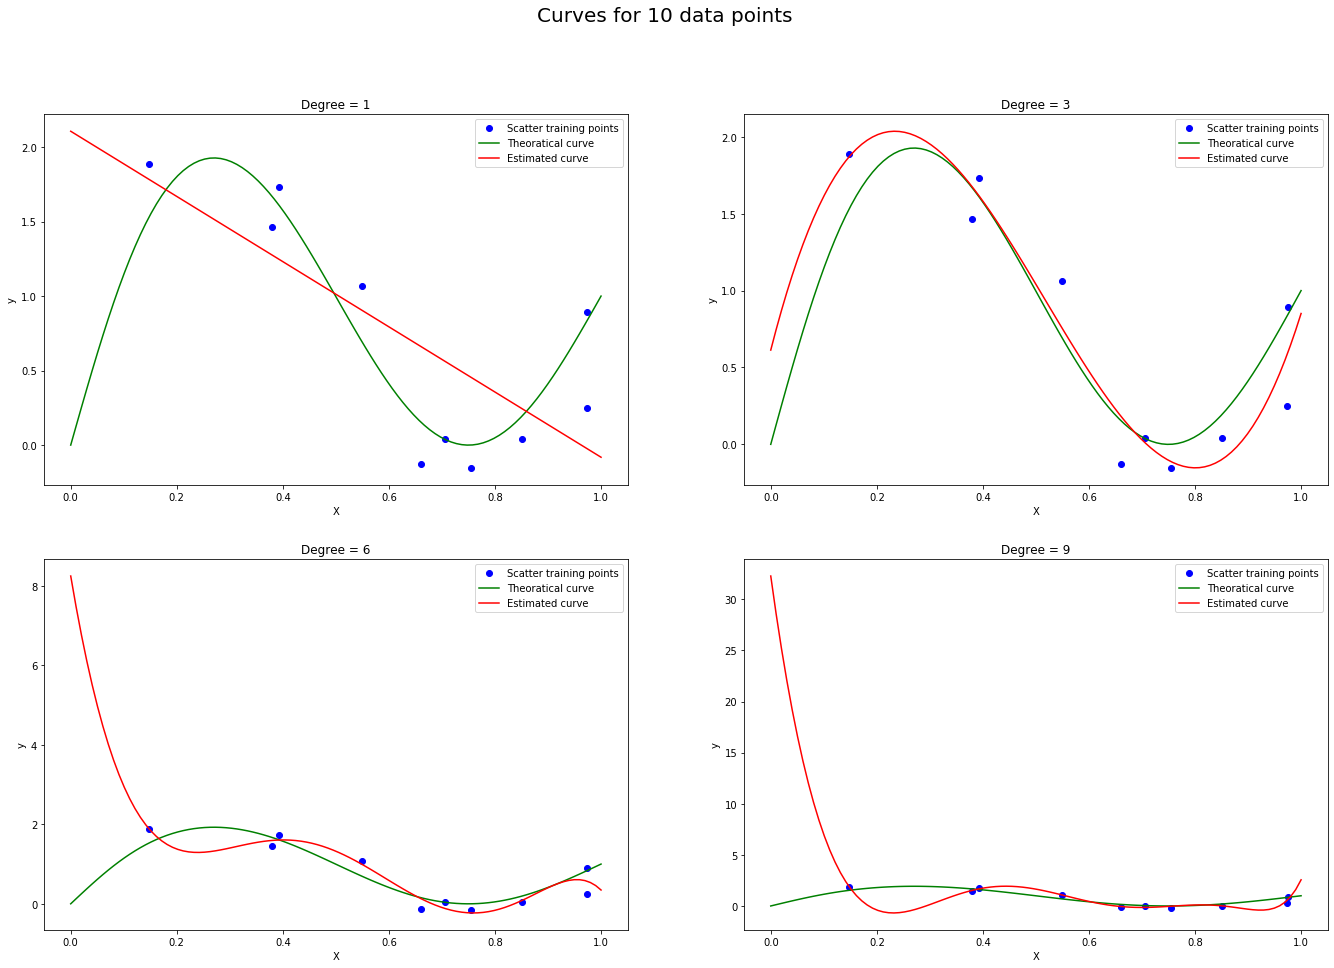

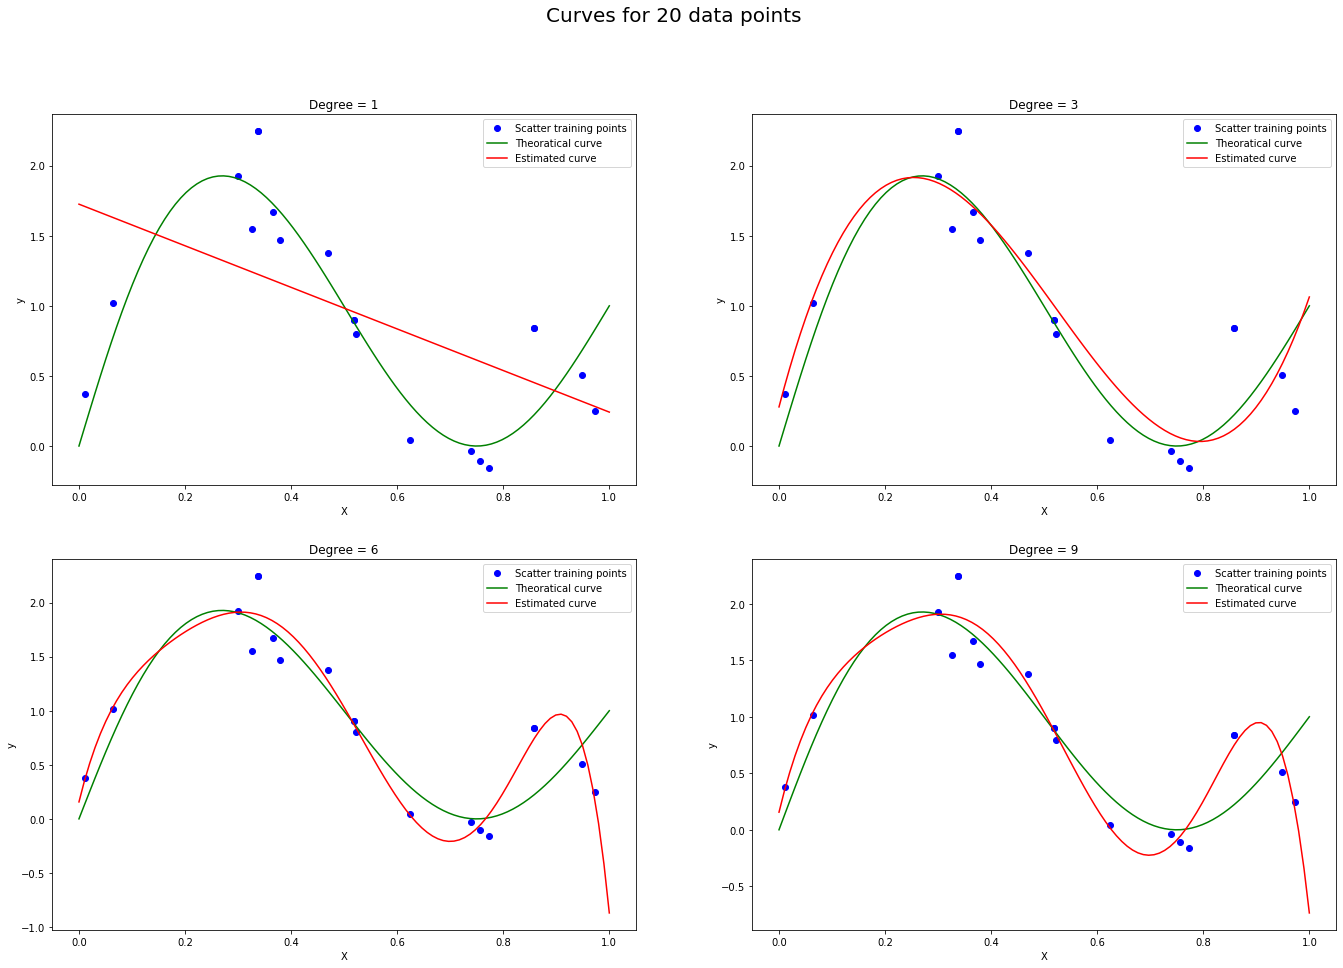

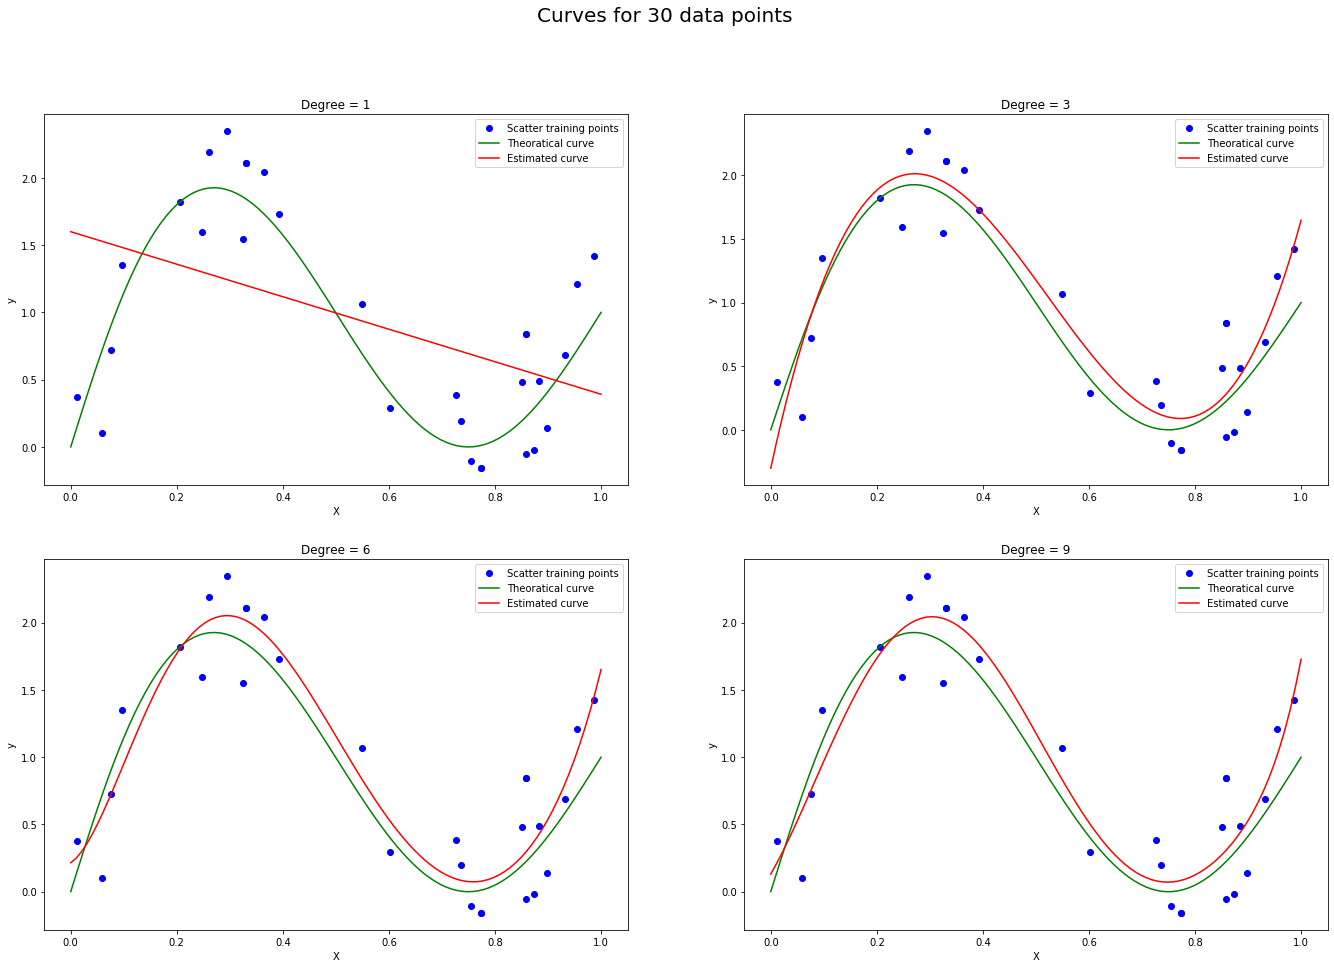

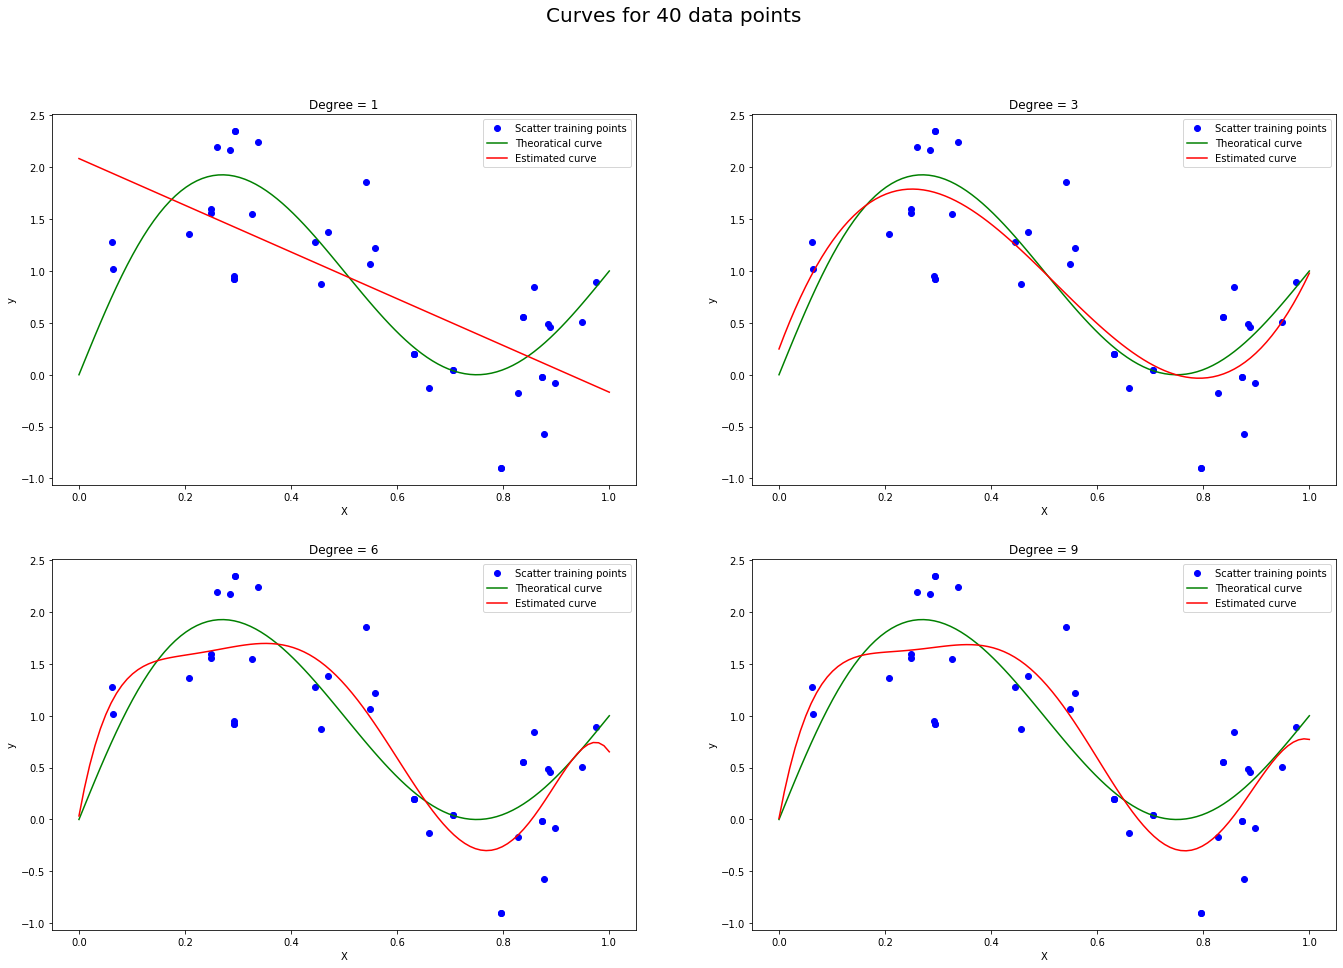

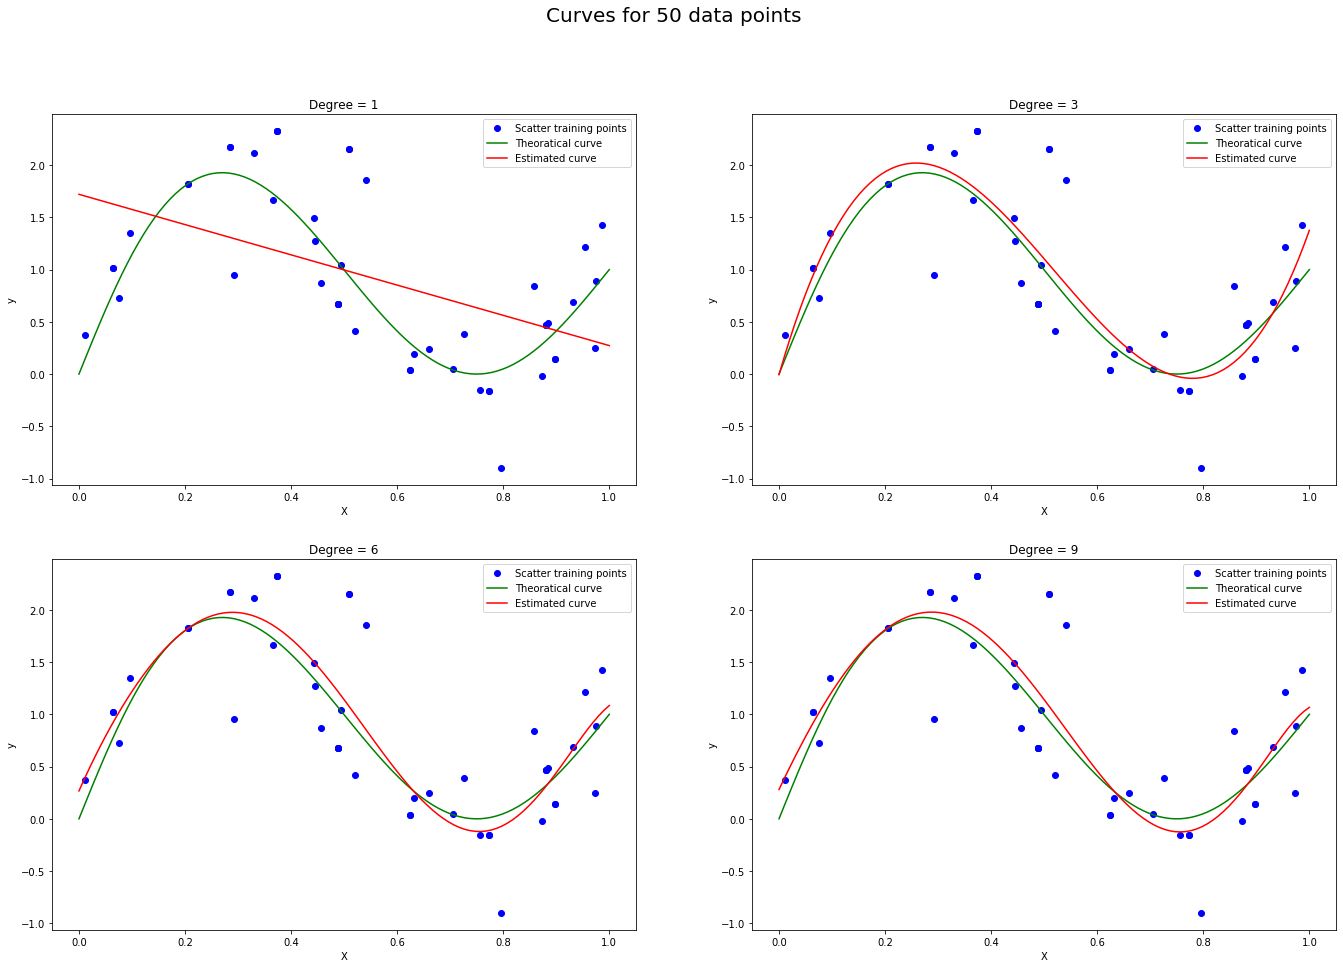

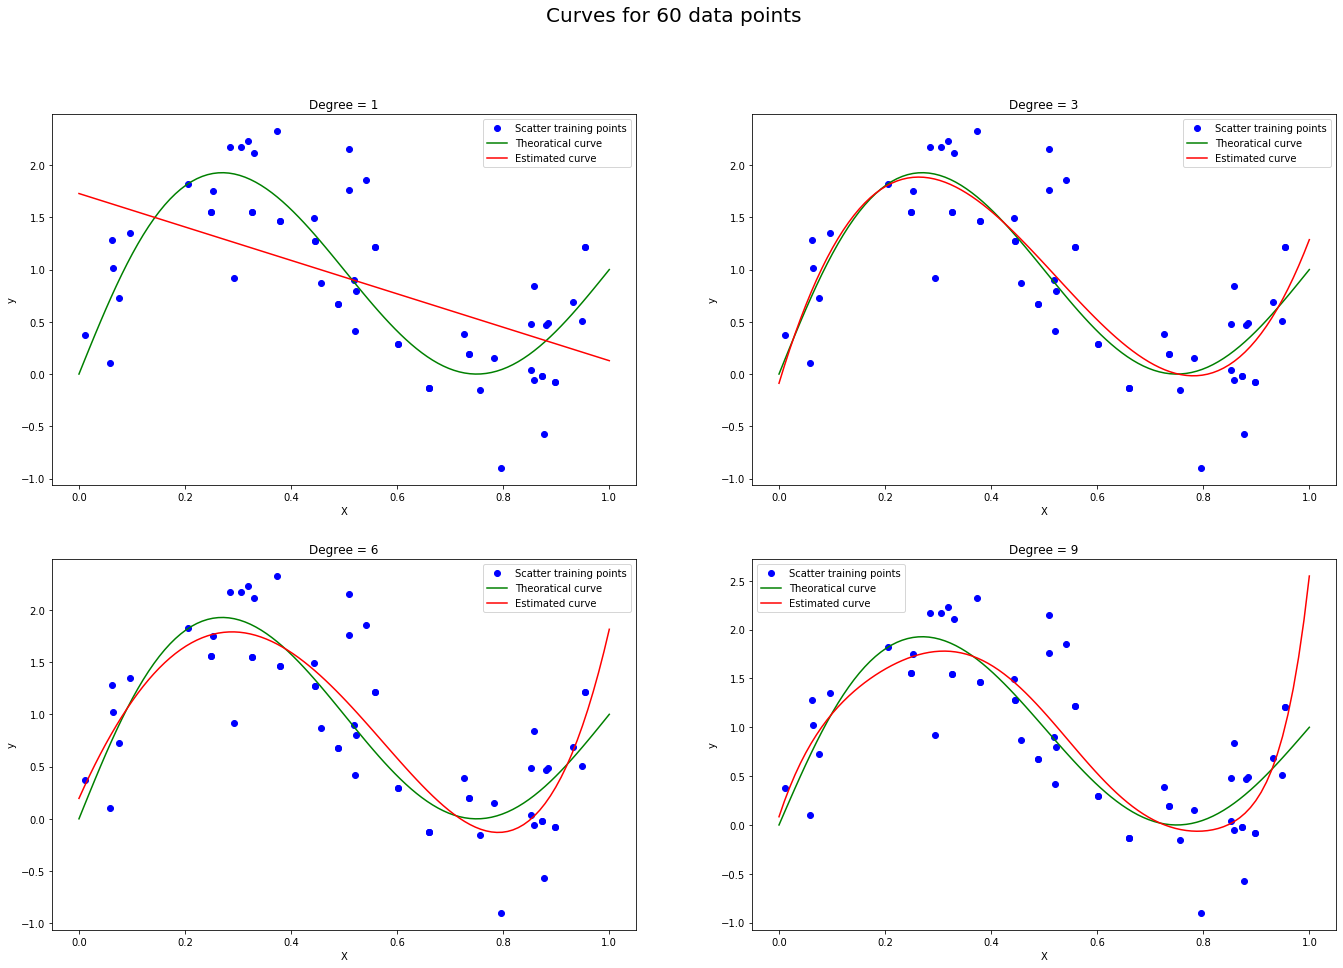

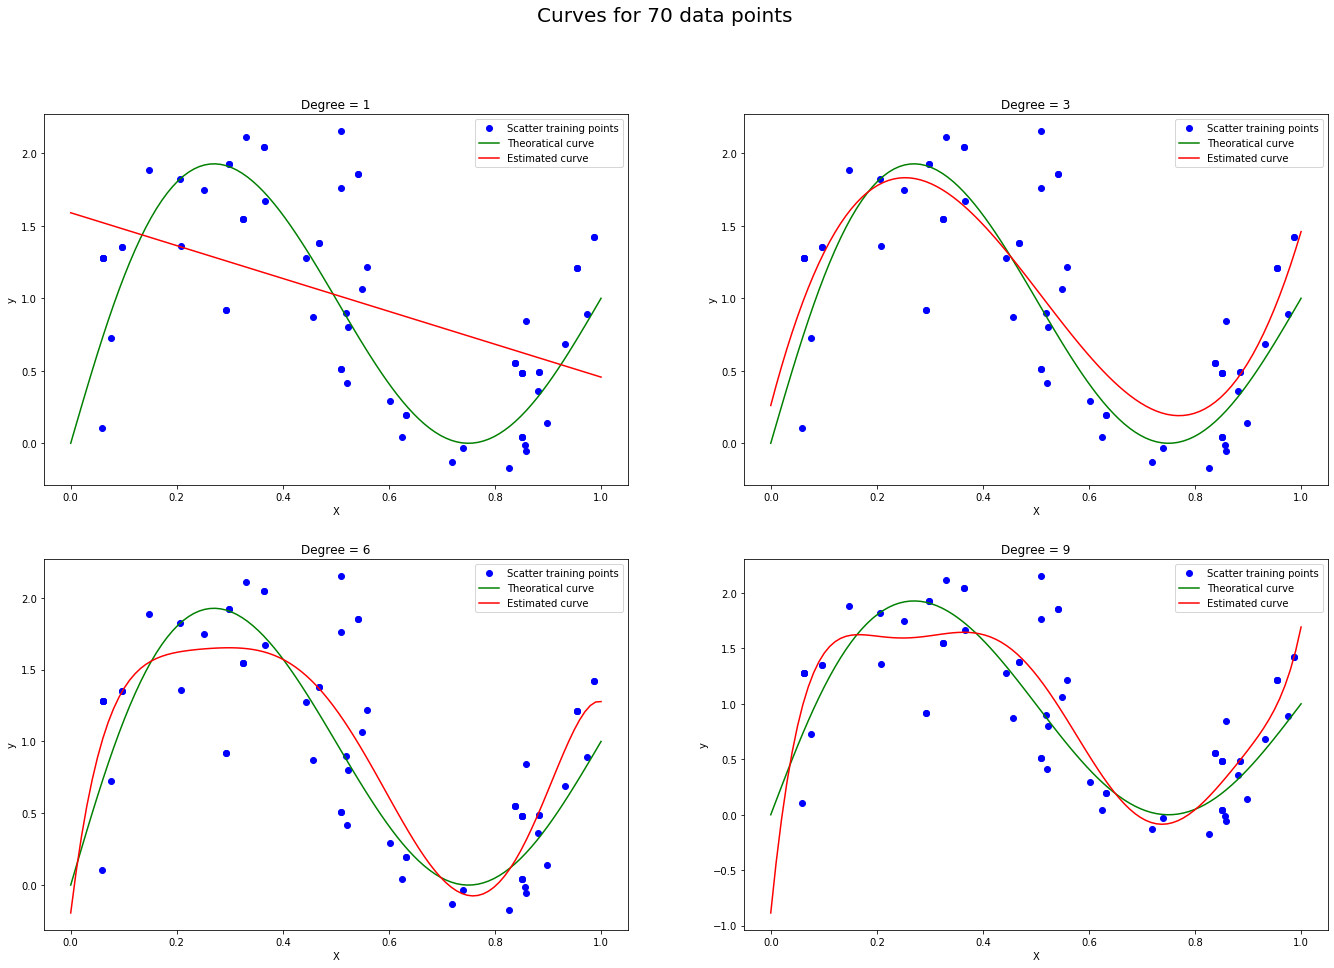

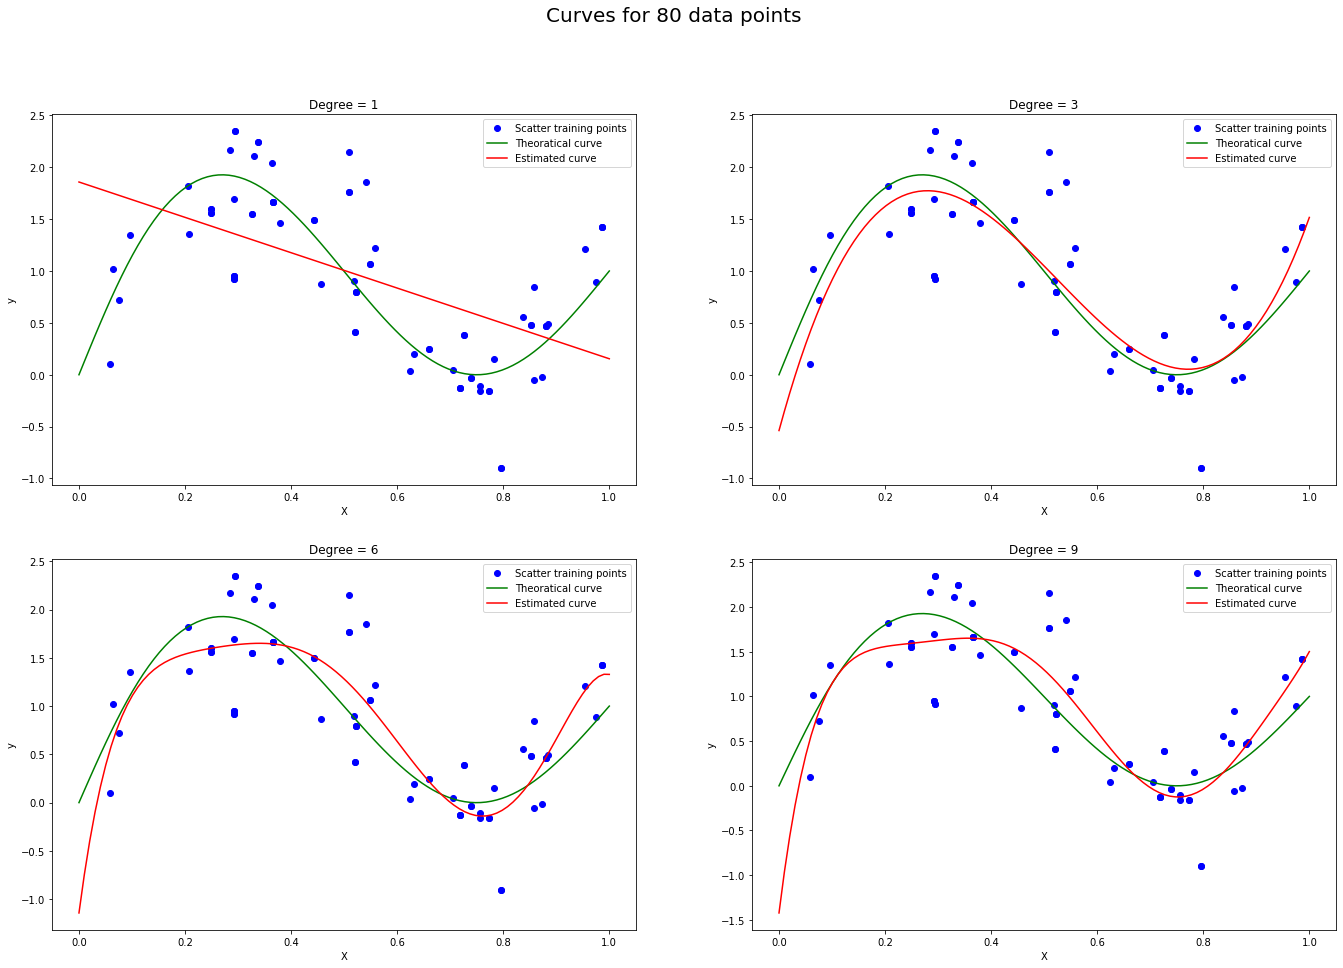

In [88]:
#a,b part of the question
e_train=0
j_t=[]
w_t=[]
d=np.array([1,3,6,9])
for s in range(10,90,10):
    #s=10   #Data size
    i_s=np.random.choice(range(X_train.size),s)
    X_s=X_train[i_s]
    y_s=y_train[i_s]
    j_ts=np.zeros_like(d)
    w_ts=[np.zeros(i+1) for i in d]
    for i in range(d.size):
        j_ts[i],w_ts[i]=poly_reg(X_s,y_s,d[i],0)
        if s==10 and i==3: e_train=E_rms(X_s,w_ts[i],0)
    j_t.append(j_ts)
    w_t.append(w_ts)
    x_temp=np.linspace(0,1,100)
    fig, axes = plt.subplots(2,2,figsize=(23,15))
    fig.suptitle('Curves for '+str(s)+' data points',fontsize='20')
    for i,ax in enumerate(axes.flat):
        ax.plot(X_s,y_s,'bo',x_temp,assigned_fun_v(x_temp),'g-',x_temp,y_estimate_fun(x_temp,w_ts[i],d[i]),'r-')
        ax.set(xlabel='X',ylabel='y',title=('Degree = '+str(d[i])))
        ax.legend(('Scatter training points','Theoratical curve','Estimated curve'))

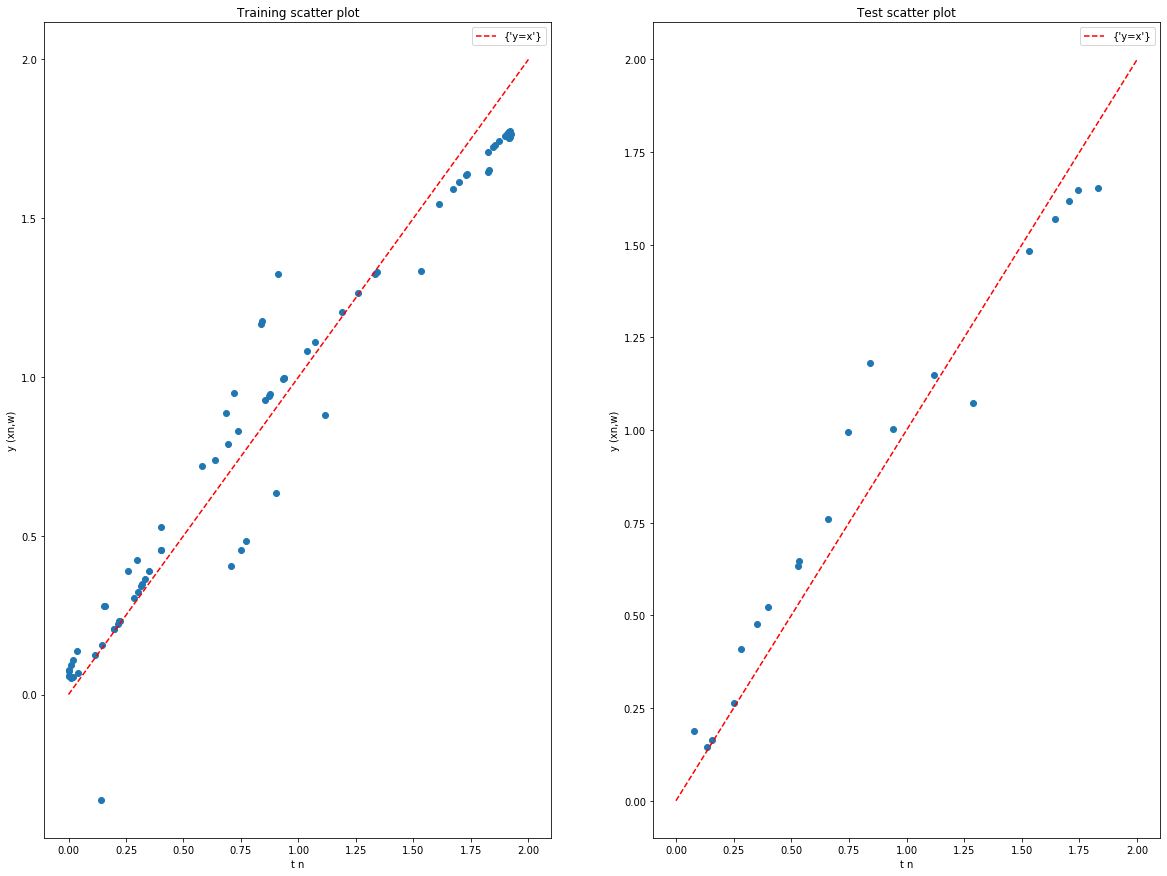

In [113]:
#c_part of the question
i_m=1
i_s=7
fig, axes = plt.subplots(1,2,figsize=(20,15))
axes[0].scatter(assigned_fun_v(X_train),y_estimate_fun(X_train,w_t[i_s][i_m],d[i_m]))
axes[0].plot(np.linspace(0,2,20),np.linspace(0,2,20),'r--',label={'y=x'})
axes[0].legend()
axes[0].set(xlabel='t n',ylabel='y (xn,w)',title='Training scatter plot')
axes[1].scatter(assigned_fun_v(X_test),y_estimate_fun(X_test,w_ts[1],d[1]))
axes[1].plot(np.linspace(0,2,20),np.linspace(0,2,20),'r--',label={'y=x'})
axes[1].set(xlabel='t n',ylabel='y (xn,w)',title='Test scatter plot')
axes[1].legend()

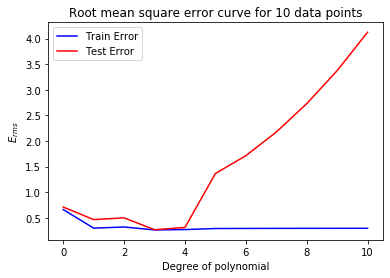

In [159]:
#Learning curves for model trained using small no. of data points
s=10
i_s=np.random.choice(range(X_train.size),s)
X_s=X_train[i_s]
y_s=y_train[i_s]
M=np.arange(11)
e_m_train=[]
e_m_test=[]
w_m=[]
for m in M:
    temp_j,temp_w=poly_reg(X_s,y_s,m,0)
    w_m.append(temp_w)
    temp_e_m=E_rms(X_s,w_m[m],0)
    e_m_train.append(temp_e_m)
    temp_e_m=E_rms(X_test,w_m[m],0)
    e_m_test.append(temp_e_m)
plt.plot(M,e_m_train,'b-',M,e_m_test,'r-')
plt.xlabel('Degree of polynomial')
plt.ylabel(r'$E_{rms}$')
plt.title('Root mean square error curve for 10 data points')

plt.legend(('Train Error','Test Error'))

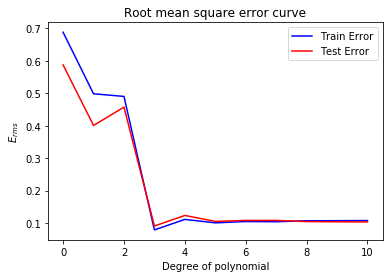

In [146]:
#s=10
#i_s=np.random.choice(range(X_train.size),s)
#Learning curves for model trained using all training data points
X_s=X_train#[i_s]
y_s=y_train#[i_s]
M=np.arange(11)
e_m_train=[]
e_m_test=[]
w_m=[]
for m in M:
    temp_j,temp_w=poly_reg(X_s,y_s,m,0)
    w_m.append(temp_w)
    temp_e_m=E_rms(X_s,w_m[m],0)
    e_m_train.append(temp_e_m)
    temp_e_m=E_rms(X_test,w_m[m],0)
    e_m_test.append(temp_e_m)
plt.plot(M,e_m_train,'b-',M,e_m_test,'r-')
plt.xlabel('Degree of polynomial')
plt.ylabel(r'$E_{rms}$')
plt.title('Root mean square error curve')
plt.legend(('Train Error','Test Error'))

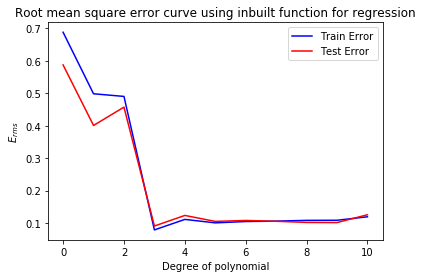

In [147]:
# Using inbuilt function
# s=80
# i_s=np.random.choice(range(X_train.size),s)
X_s=X_train#[i_s]
y_s=y_train#[i_s]
M=np.arange(11)
e_m_train=[]
e_m_test=[]
w_m=[]
for m in M:
    temp_w=np.polyfit(X_s,y_s,m)
    temp_w=temp_w[::-1]
    w_m.append(temp_w)
    temp_e_m=E_rms(X_s,w_m[m],0)
    e_m_train.append(temp_e_m)
    temp_e_m=E_rms(X_test,w_m[m],0)
    e_m_test.append(temp_e_m)
plt.plot(M,e_m_train,'b-',M,e_m_test,'r-')
plt.xlabel('Degree of polynomial')
plt.ylabel(r'$E_{rms}$')
plt.title('Root mean square error curve using inbuilt function for regression')
plt.legend(('Train Error','Test Error'))

In [114]:
#Test that manually coded poly_reg is correct
temp_w_built_in=np.polyfit(X_train,y_train,3)
temp_w_man=poly_reg(X_train,y_train,3,0)
print(temp_w_built_in[::-1])#As the output is in decreasing order [::-1] is used to reverse it
print(temp_w_man[1])        #Manually coded function returns two values of which 2nd one is required array

[ -0.08194983  16.94123184 -42.76267711  27.12145843]
[ -0.0819516   16.94123463 -42.76266521  27.12144345]
